Nilu Isakova

# Airbnb Project 
#### Description
Airbnb is an online platform that allows people to rent short-term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

 

#### Objective
To explore and visualize the data, build a linear regression model to predict the prices of Airbnb rental rooms, and generate a set of insights and recommendations that will help the business.

 

#### Data Description
The data contains information about the different types of rental rooms offered by Airbnb over a fixed period of time. The detailed data dictionary is given below.

#### Data Dictionary

* id: Property ID
* room_type: Type of Room in the property
* accommodates: How many adults can this property accommodate
* bathrooms: Number of bathrooms on the property
* cancellation_policy: Cancellation policy of the property
* cleaning_fee: This denotes whether the property cleaning fee is included in the rent or not
* instant_bookable: It indicates whether an instant booking facility is available or not
* review_scores_rating: Review rating score of the property
* bedrooms: Number of bedrooms in the property
* beds: Total number of beds in the property
* log_price: Log of the rental price of the property for a fixed period. [If the price is 12000 dollars, then log_price represents log(12000)]


In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.naive_bayes import MultinomialNB



from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import scipy.stats as stats
from sklearn import metrics

# Data Preprocessing 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer, StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  # ignore warnings


Bad key echo "backend in file /Users/nilu/.matplotlib/matplotlibrc, line 2 ('echo "backend : TKAgg" > ~/.matplotlib/matplotlibrc')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# loading the dataset
df = pd.read_csv("AirBNB.csv", engine="python")

In [3]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
# checking the shape of the data
print(f"Observations: There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

Observations: There are 74111 rows and 11 columns.


In [5]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


#### Observations:
most of the colums have float and object data types

In [6]:
# checking for duplicate values
df.duplicated().sum()

0

#### Observations:

There is one duplicate value in the data.

In [7]:
# checking for missing values
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

#### Observations:
we can see that there many null values

In [8]:
# forward-fill
df = df.fillna(method='ffill')
df = df.fillna(df.mean())

In [9]:
# # dropping nan values
# df = df.dropna(subset=['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
#        'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
#        'beds', 'log_price'])

In [10]:
# checking for missing values after filling na and dropping
df.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [11]:
# checking the shape of the data
print(f"Observations: There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

Observations: There are 74111 rows and 11 columns.


In [12]:
# Let's look at the statistical summary of the data
df.describe(include="all")

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74111,74111.000000,74111.000000,74111,74111,74111,74111.000000,74111.000000,74111.000000,74111.000000
unique,NaN,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,NaN,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,NaN,41311,NaN,NaN,32503,54402,54660,NaN,NaN,NaN,NaN
mean,1.126662e+07,NaN,3.155267,1.235383,NaN,NaN,NaN,94.083065,1.265885,1.710677,4.782069
std,6.081735e+06,NaN,2.153709,0.582368,NaN,NaN,NaN,7.783654,0.851976,1.253673,0.717394
min,3.440000e+02,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


#### Observations:
from the correlation table we can see that the log price is positively correlated with accomodation while the review scores rating is negatively coorelated with beds columns

#### Exploratory Data Analysis
#### Univariate Analysis

In [13]:
df.columns

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [14]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """ 
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram



In [15]:
def create_outliers(feature: str, data):
    """ 
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

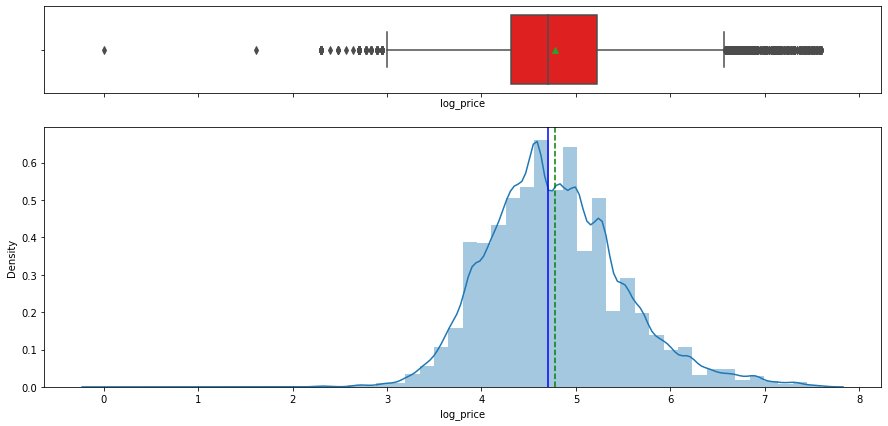

In [16]:
histogram_boxplot(df.log_price)

#### Observations:
from the plot we can see that the log_price is normally distributed

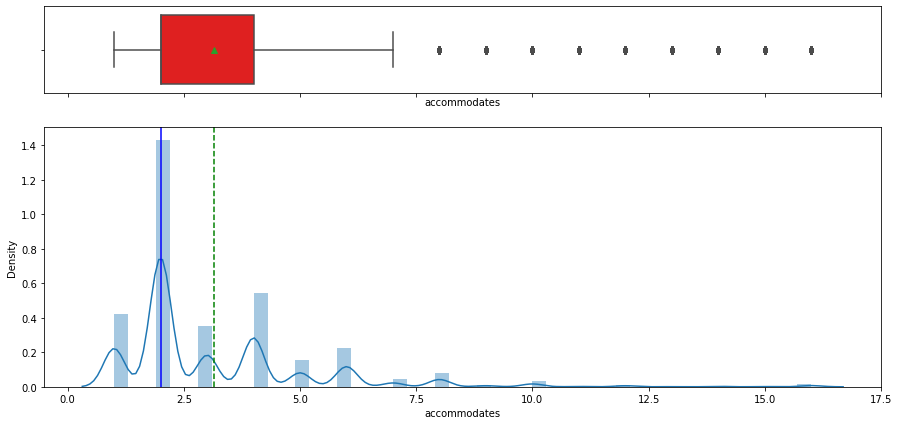

In [17]:
histogram_boxplot(df.accommodates)

#### Observations:
from the plot we can see that the highest accommodates number is between 2 and 4

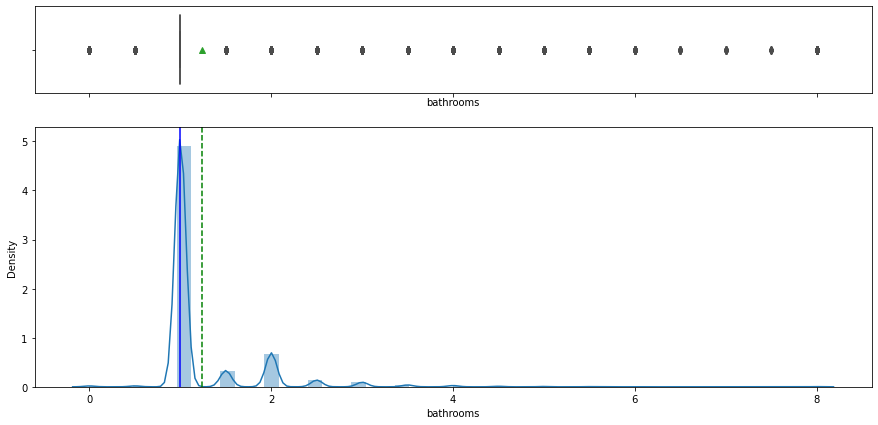

In [18]:
histogram_boxplot(df.bathrooms)

#### Observations:

from the plot we can see that most of the rooms are 1 bathrooms

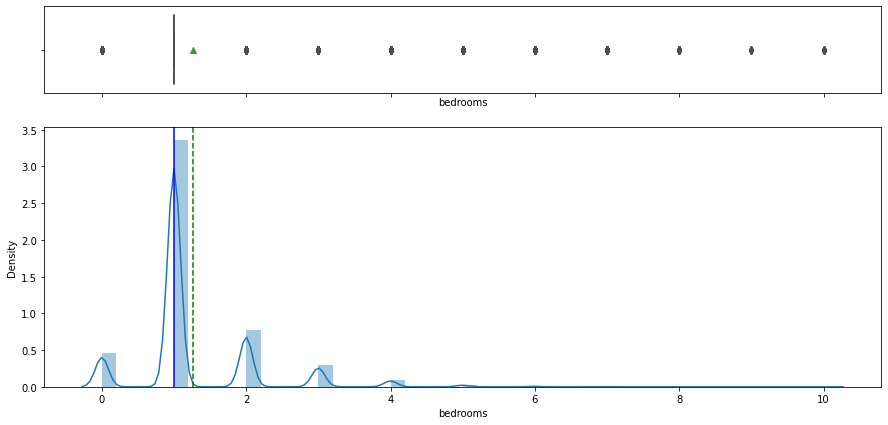

In [19]:
histogram_boxplot(df.bedrooms)

#### Observations:

from the plot we can see that most of the rooms are 1 bedrooms

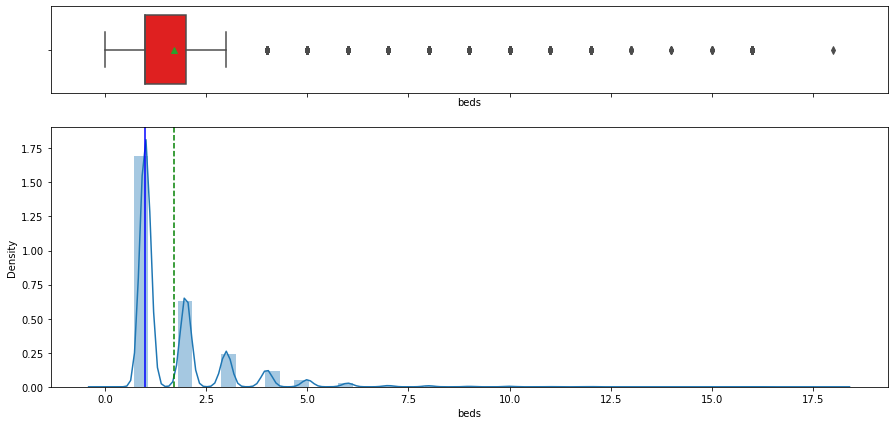

In [20]:
histogram_boxplot(df.beds)

#### Observations:

from the plot we can see that most of the rooms have1 to 3 beds

#### Bivariate analysis

<AxesSubplot:title={'center':'Correlation of Attributes'}>

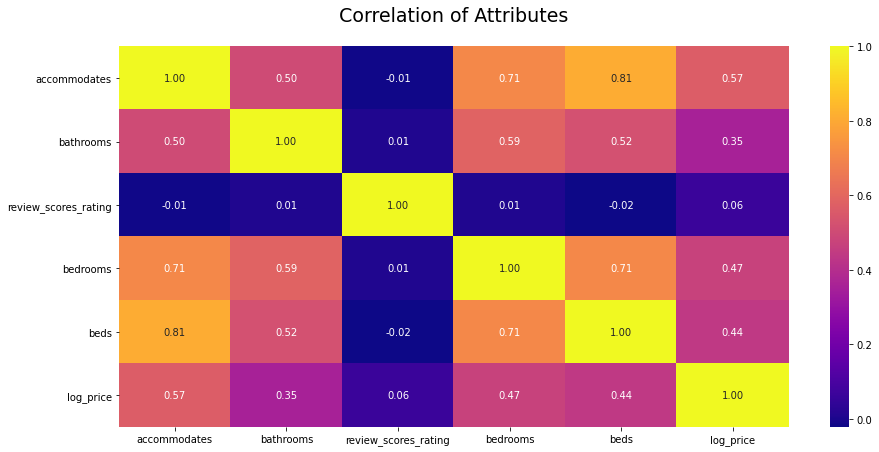

In [21]:
# looking the correaltion again
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.drop(['id','cleaning_fee'], axis=1).corr(), cmap='plasma',annot=True, fmt='.2f')

#### Observations:

accommodates and bedrooms are important predictors of price, but they are also highly correlated to each other.


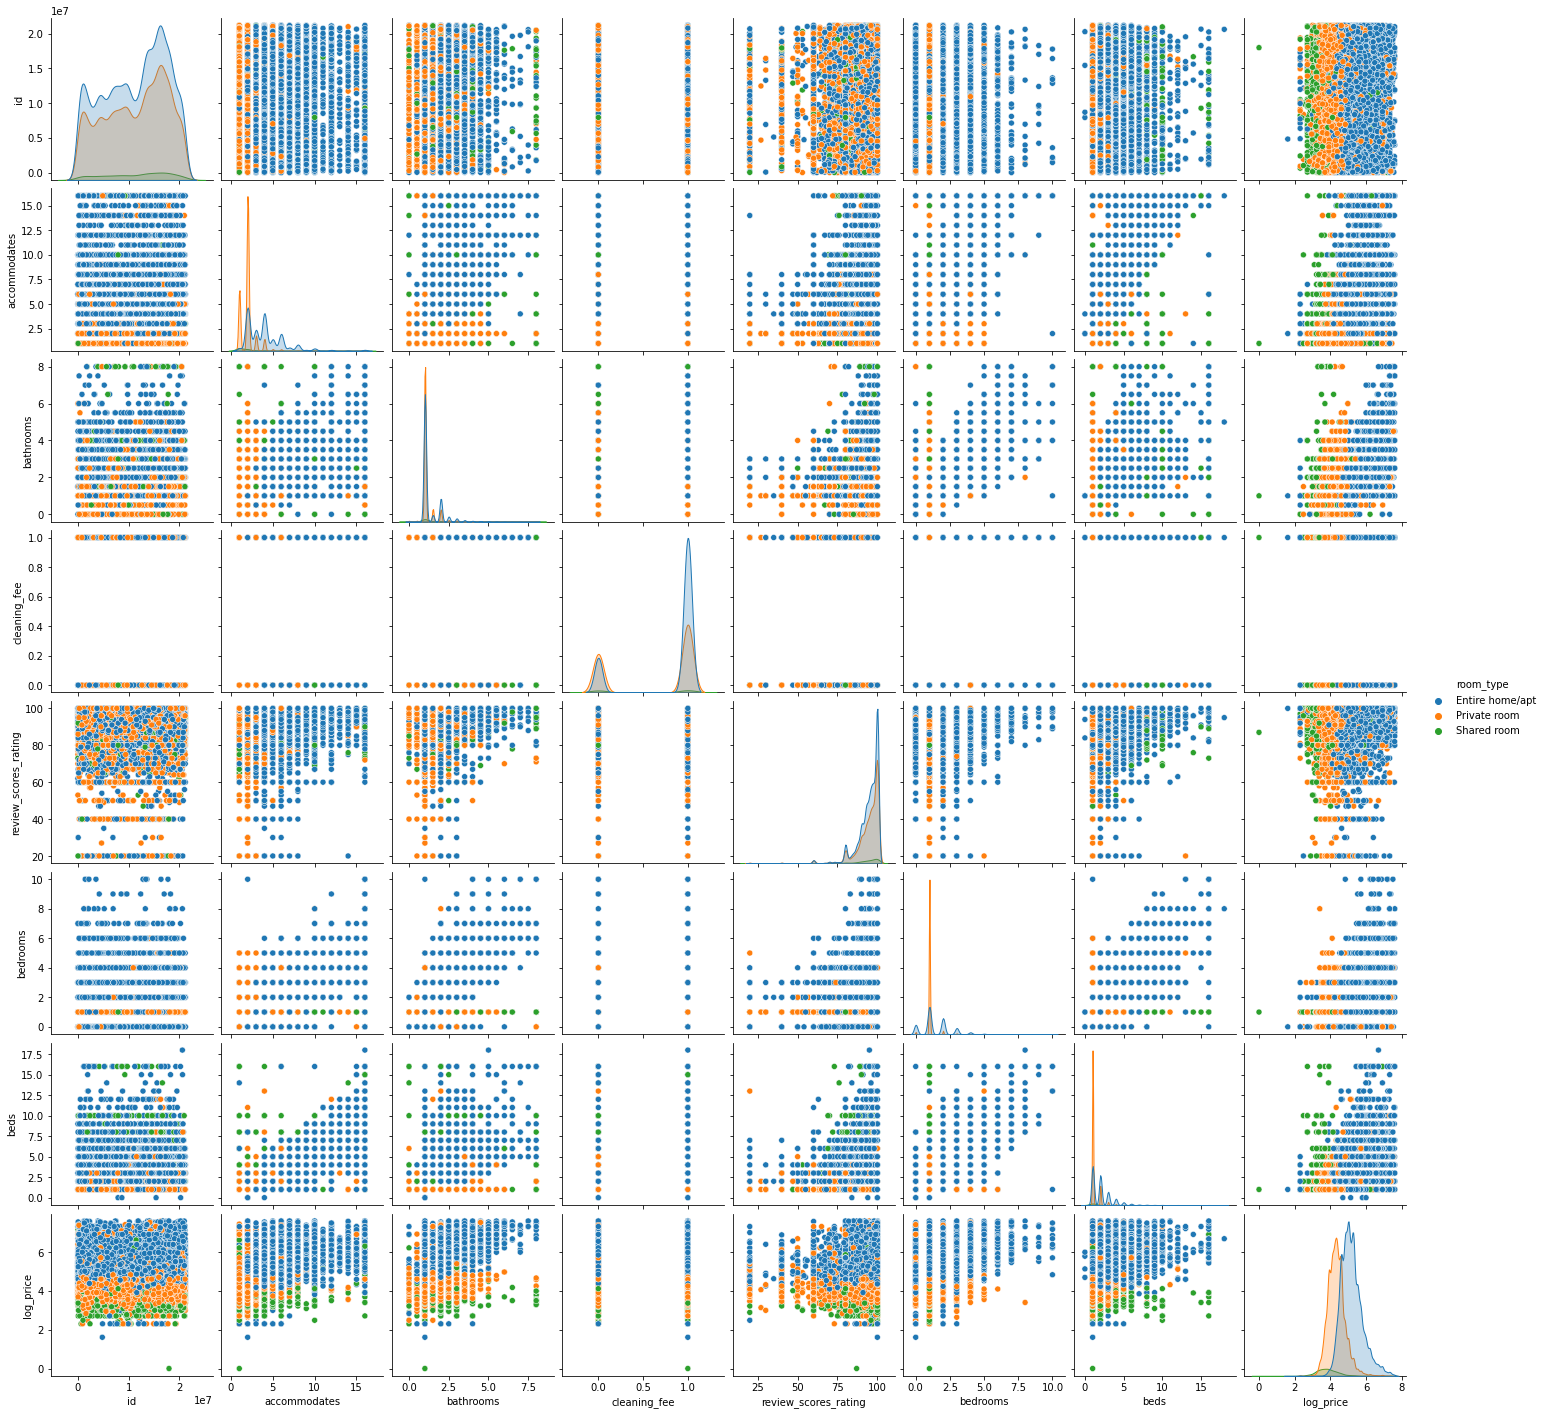

In [22]:
sns.pairplot(data=df, hue="room_type")
plt.show()

#### Observation:
from the plot we can see that log price is relatively correlated with beds, bedrooms and bathrooms

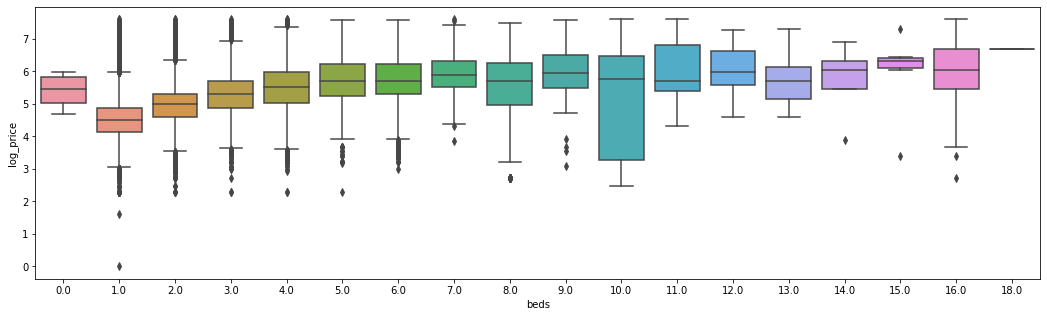

In [23]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="beds", y="log_price", data=df)
plt.show()

#### Observations:
interestingly price is almost same for the different beds

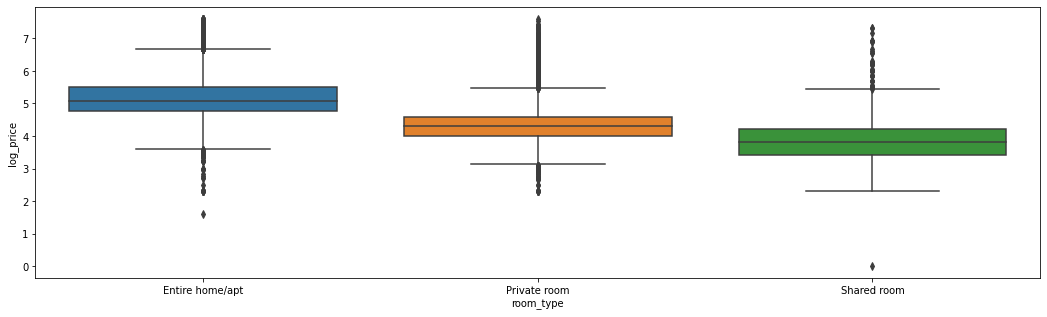

In [24]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="room_type", y="log_price", data=df)
plt.show()

#### Observations:
the price is expensive for the entire home or apartment, but its similar to private room and shared rooms

In [25]:
def perc_on_bar(plot, feature):
    """
    Shows the percentage on the top of bar in plot.
    feature: categorical feature
    The function won't work if a column is passed in hue parameter
    """
    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

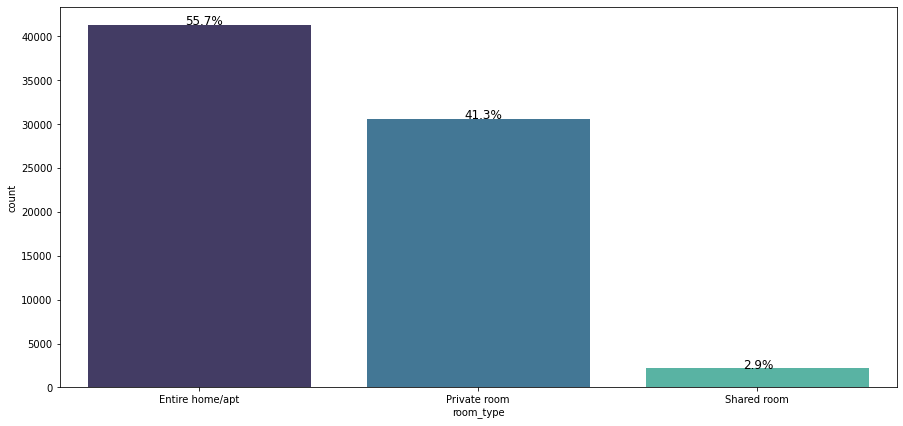

In [26]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(df.room_type, palette='mako')
perc_on_bar(ax, df.room_type)

#### Observations:
50 % of the customers prefered entire home or apartment and 41 % of the customers prefer private rooms and only 2.9% of the customers prefer shared rooms 

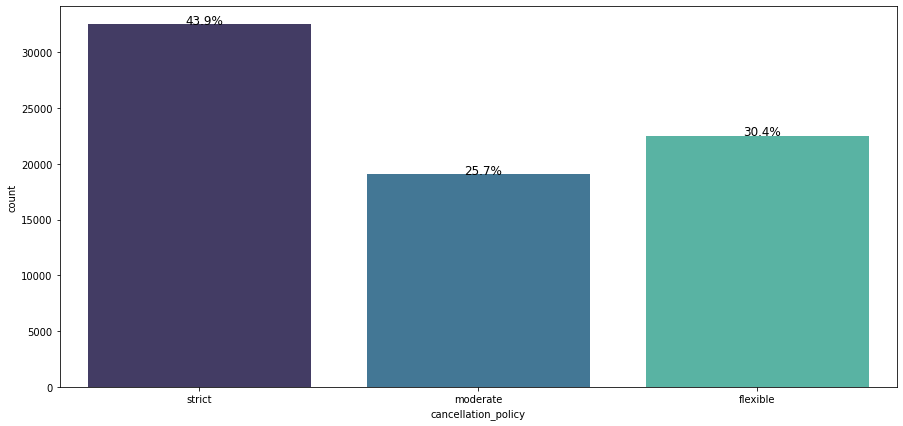

In [27]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(df.cancellation_policy, palette='mako')
perc_on_bar(ax, df.cancellation_policy)

#### Observations:

43 % of the renters have stric cancelation rules while only 30% has flexible cancelation rules

<AxesSubplot:xlabel='bedrooms', ylabel='log_price'>

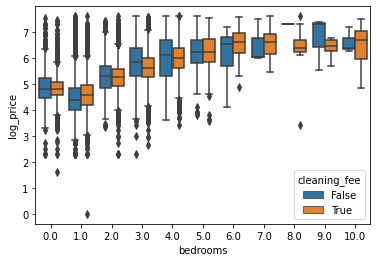

In [28]:
sns.boxplot(x='bedrooms',y='log_price',hue='cleaning_fee',data=df)

### Observations : 
It seems the bedrooms with cleaning fees are more expensive

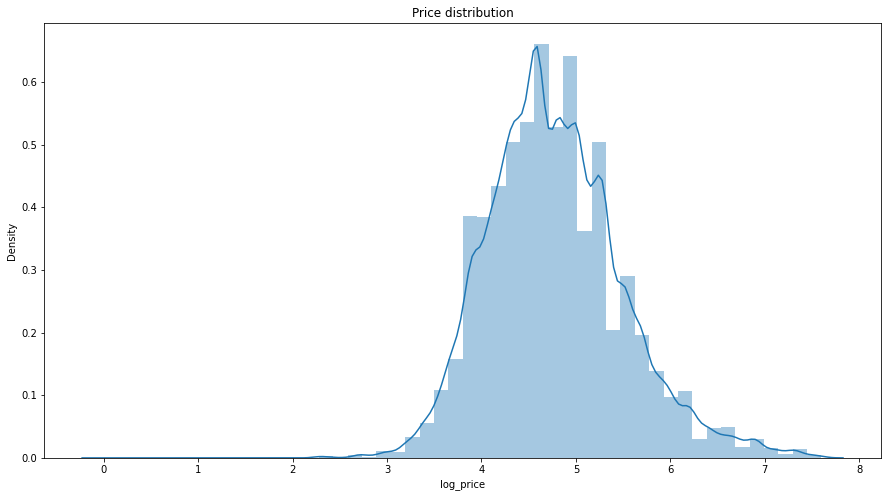

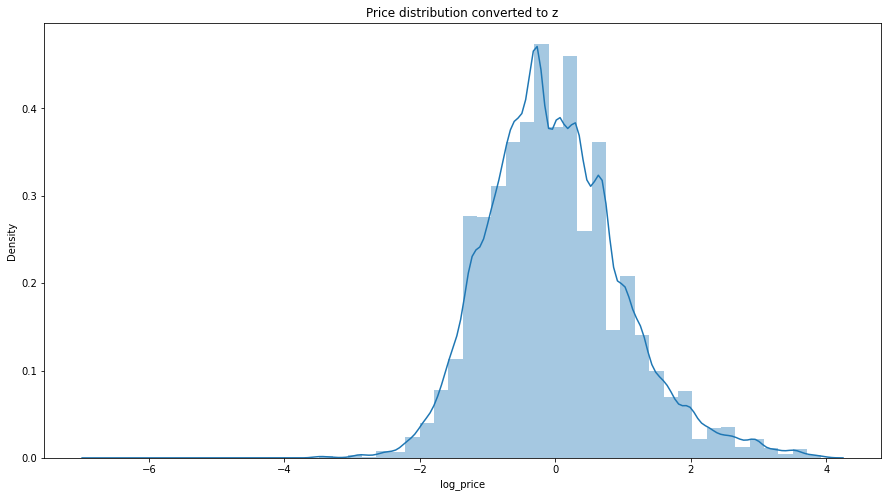

In [29]:
plt.figure(figsize = (15, 8))
sns.distplot(df['log_price'])
plt.title('Price distribution')
plt.show()


plt.figure(figsize = (15, 8))
sns.distplot((df['log_price']-np.mean(df['log_price'])) / np.std(df['log_price']))
plt.title('Price distribution converted to z')
plt.show()

#### Data pre processing

In [30]:
# let's check again for missing values
df.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [31]:
# dropping id and instant_bookable columns, since they do not have any values for future modeling
try:
    df.drop(columns = ['id'],inplace = True)
    df.head()
except:
    print("columns already droped")

In [32]:

df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x: 1 if x=='True' else 0)
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 1 if x=='t' else 0)

In [33]:
df['bedrooms_per_accommodates'] = df['bedrooms'] / df['accommodates']

In [34]:
df = pd.get_dummies(df)
df.head()

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,3.0,1.0,0,0,100.0,1.0,1.0,5.010635,0.333333,1,0,0,0,0,1
1,7.0,1.0,0,1,93.0,3.0,3.0,5.129899,0.428571,1,0,0,0,0,1
2,5.0,1.0,0,1,92.0,1.0,3.0,4.976734,0.200000,1,0,0,0,1,0
3,4.0,1.0,0,0,92.0,2.0,2.0,6.620073,0.500000,1,0,0,1,0,0
4,2.0,1.0,0,1,40.0,0.0,1.0,4.744932,0.000000,1,0,0,0,1,0


#### Linear Model Building
* We want to predict the room prices, so we will use the normalized version price_log for modeling.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.
* We will build a Linear Regression model using the train data and then check it's performance.

In [35]:
df.head()

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,3.0,1.0,0,0,100.0,1.0,1.0,5.010635,0.333333,1,0,0,0,0,1
1,7.0,1.0,0,1,93.0,3.0,3.0,5.129899,0.428571,1,0,0,0,0,1
2,5.0,1.0,0,1,92.0,1.0,3.0,4.976734,0.200000,1,0,0,0,1,0
3,4.0,1.0,0,0,92.0,2.0,2.0,6.620073,0.500000,1,0,0,1,0,0
4,2.0,1.0,0,1,40.0,0.0,1.0,4.744932,0.000000,1,0,0,0,1,0


In [36]:
# defining the dependent and independent variables
X = df.drop(["log_price"], axis=1)
y = df["log_price"]

In [37]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
print("Number of rows in train data =", X_train.shape)
print("Number of rows in test data =", X_test.shape)

Number of rows in train data = (51877, 14)
Number of rows in test data = (22234, 14)


In [39]:
df.head()

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,3.0,1.0,0,0,100.0,1.0,1.0,5.010635,0.333333,1,0,0,0,0,1
1,7.0,1.0,0,1,93.0,3.0,3.0,5.129899,0.428571,1,0,0,0,0,1
2,5.0,1.0,0,1,92.0,1.0,3.0,4.976734,0.200000,1,0,0,0,1,0
3,4.0,1.0,0,0,92.0,2.0,2.0,6.620073,0.500000,1,0,0,1,0,0
4,2.0,1.0,0,1,40.0,0.0,1.0,4.744932,0.000000,1,0,0,0,1,0


In [40]:
# fitting a linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [41]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
accommodates,5.042869e-02
bathrooms,1.422997e-01
cleaning_fee,1.457168e-16
instant_bookable,-5.854282e-02
review_scores_rating,4.501688e-03
bedrooms,2.269009e-01
beds,-5.078520e-02
bedrooms_per_accommodates,-2.355867e-01
room_type_Entire home/apt,5.485750e-01
room_type_Private room,-5.494700e-02


#### Model Performance Check

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [42]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [43]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, X_train, y_train)
lin_reg_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,136.343327,63.834793,0.348587,0.348411,39.616936


* Both the R-squared and Adjusted R squared of our model are very low. This is a clear indication that we have been able to create a very bad model.

* The model is underfitting model.

* Let's do a quick performance check on the test data.

In [44]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, X_test, y_test)
lin_reg_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,133.820265,63.4119,0.363684,0.363283,39.314507


In [45]:

lr = LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

LinearRegression mrse_train: 0.4981049522177173, mrse_test: 0.4984881543627097
Ridge mrse_train: 0.49810495624111156, mrse_test: 0.49848775510537285 best alpha: 1.0
Lasso mrse_train: 0.5053975209207696, mrse_test: 0.5060246706384802 best alpha: 0.01
ElasticNet mrse_train: 0.4988383526490751, mrse_test: 0.4990639858538133 best alpha: 0.01 best l1: 0.001


#### Observations:
The testing error from Ridge, Lasso and ElasticNet is just a little better than the baseline testing errors !

Non-zero Lasso coefficients ordered by importance

In [48]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(lasso.coef_[i]))

room_type_Entire home/apt, 0.6015411480483848
bedrooms, 0.13497342417443772
bathrooms, 0.1028705619105976
accommodates, 0.07835312159935442
review_scores_rating, 0.004776462188585022


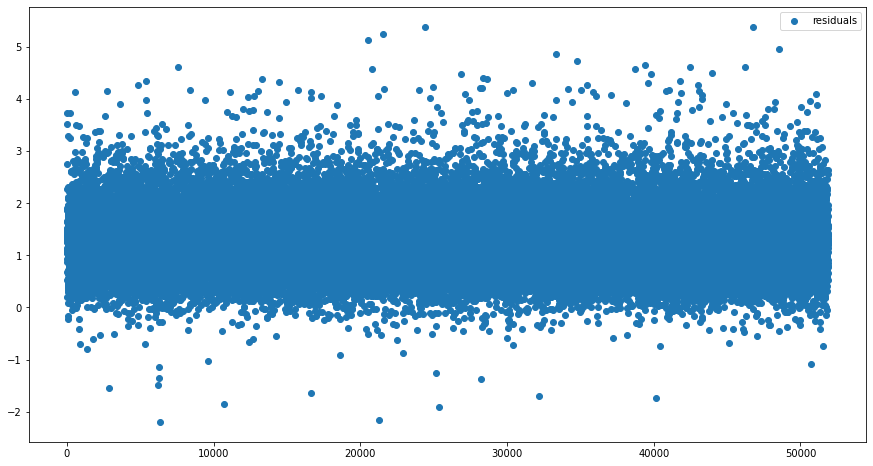

In [49]:
# error analysis
y_pred_train = lasso.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

In [50]:
pf = PolynomialFeatures(degree=2)
pf.fit(X_train_scaled)
X_train_scaled = pf.transform(X_train_scaled)
X_test_scaled = pf.transform(X_test_scaled)

In [51]:
for model, name in zip([lr, ridge, lasso], ['LinearRegression', 'Ridge', 'Lasso']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test))

LinearRegression mrse_train: 0.4880714400545319, mrse_test: 0.48969397453358016
Ridge mrse_train: 0.48807248633936584, mrse_test: 0.4897047476637314
Lasso mrse_train: 0.49097246230953223, mrse_test: 0.49226896164410494


#### Observations:
The testing error from Ridge, Lasso with PolynomialFeatures seems not impoved the scores 



In [52]:
poly_features = pf.get_feature_names(X_train.columns)

In [53]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(poly_features[i] + ', ' + str(lasso.coef_[i]))

room_type_Entire home/apt, 0.31001778611426345
accommodates, 0.14482370355887586
bedrooms, 0.07909753014045912
bathrooms, 0.07726514287395697
bathrooms room_type_Entire home/apt, 0.07515578082395119
review_scores_rating, 0.035208133763388036
bedrooms_per_accommodates room_type_Entire home/apt, 0.01761509635094506
beds bedrooms_per_accommodates, 0.006946884879028086
cancellation_policy_flexible, 0.004440293179814635
review_scores_rating^2, 0.0035035112515124658
accommodates bedrooms_per_accommodates, 0.003241526105464667
room_type_Entire home/apt cancellation_policy_strict, 0.001463713799324534
bathrooms^2, 0.0013063874968542884


In [54]:
# put the nalaysis in function
def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

In [55]:
# metrics shown in function

def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.38,0.25,0.5,0.104,0.104,0.52,0.52


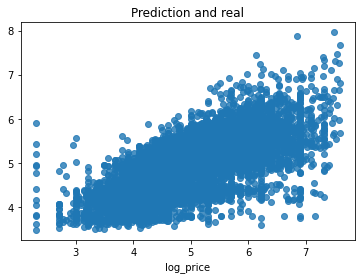

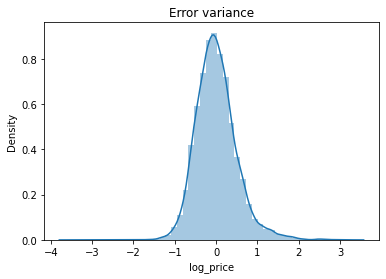

In [56]:

model2 = LinearRegression()
model2.fit(X_train, y_train)
analysis(
    model = model2, 
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test =  y_test
)

#### Business Insights and Recommendations

* We need more data to improve our model


* We will have to analyze the cost side of things before we can talk about profitability in the business. We should gather data regarding that.


* The next step post that would be to cluster different sets of data and see if we should make multiple models for different features.